# Analysing Student Performance Dataset
## by Nikita Jain

## Investigation Overview

> In this presentation I have explored various factors which affect the students score in various subject and thus affecting the overall result or performance of the student. The main factors that are being explored in this anaylsis are race/ethnicity which the student belongs whether or not they have completed the test preparation course and what is the level of education the parents of the student posess.

## Dataset Overview

> This dataset is taken from Kaggle from link :https://www.kaggle.com/spscientist/students-performance-in-exams This  dataset contains information about the marks scored by students in United States in various subjects such as maths,reading and writing Scores. Various other features are also included in the dataset such as parental level of education, whether or not they completed the test course or not and which race/ethnicity or which gender they belong to.

>Various new features were also added to the dataset such as                                                               
1) total score of each student                                                                                             
2) percentage oof each student                                                                                            
3) Pass/Fail result of each student

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
# load in the dataset into a pandas dataframe
df_clean= pd.read_csv('student_final_data.csv')
df_clean.head(5)


,Unnamed: 0,gender,race,parent_education,lunch,test_preparation_course,maths_score,reading_score,writing_score,Total_score,percentage,result
0,0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667,PASS
1,1,female,group C,some college,standard,completed,69,90,88,247,82.333333,PASS
2,2,female,group B,master's degree,standard,none,90,95,93,278,92.666667,PASS
3,3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333,PASS
4,4,male,group C,some college,standard,none,76,78,75,229,76.333333,PASS


> Note that the above cells have been set as "Skip"-type slides. That means
that when the notebook is rendered as http slides, those cells won't show up.

## Anaylsing the distribution of Marks in all subjects?

> What is the distribution of marks in all subjects?

In [3]:
def hist_box(subject): #function to plot histogram and boxplot of given feature
    avg= str(df_clean[subject].mean())
    print("Average in {sub} is".format(sub=subject)+" "+avg)
    plt.figure(figsize=(10,4), dpi=100) 
  
    
    plt.subplot(1, 2, 1);
    plt.hist(df_clean[subject]);
    plt.xlabel("{sub}".format(sub=subject));
    plt.ylabel("Frequency of marks");
    plt.title("Distribution of {sub}".format(sub=subject));


    plt.subplot(1, 2, 2);
    plt.boxplot(df_clean[subject],patch_artist=True);
    plt.xlabel("{sub}".format(sub=subject));
    plt.ylabel("Marks");
    plt.title("Distribution of {sub}".format(sub=subject));
    plt.show();

### Distribution of Maths Score

Average in maths_score is 66.089


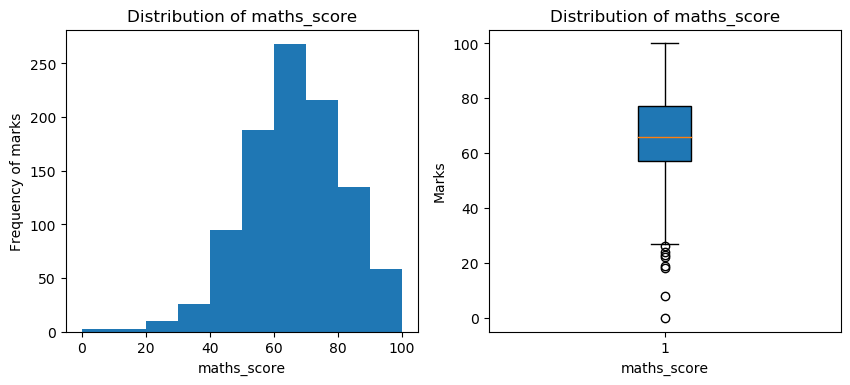

In [4]:
hist_box("maths_score") # histogram and box-plot of maths marks

> Conclusion 1 a) : As we can see from above drawn histogram and box plot average marks for maths subject are 67 and maximum of students have scored between 60-80 marks and few students have also scored below 25 marks and failed in the subject.

### Distribution of Reading Score

Average in reading_score is 69.169


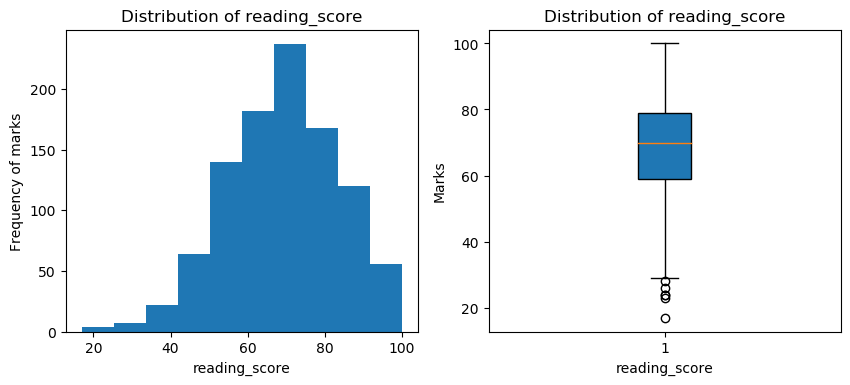

In [5]:
hist_box("reading_score") # histogram and box-plot of reading marks

> Conclusion 1 b) :As we can see from above drawn histogram and box plot that average marks in reading score is 69 and maximum of students have scored between 60-80 marks and few students have also scored below 25 marks in the subject.

### Distribution of Writing Score

Average in writing_score is 68.054


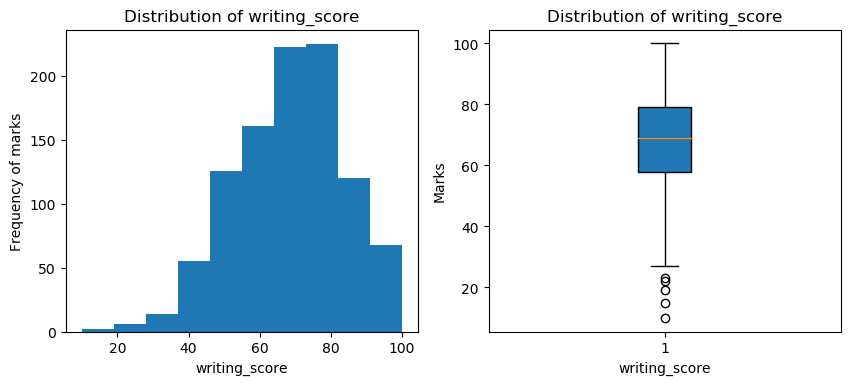

In [6]:
hist_box("writing_score") # histogram and box-plot of writing marks

> Conclusion 1 c): As we can see from above drawn histogram and box plot that average marks in writing score is 68 and maximum of students have scored between 60-80 marks and few students have also scored below 25 marks in the subject.

## Anaylsis of result of students

>What is the proportion of students that have failed or passed?

Percentage of students who have passed 98.5
Percentage of students who have failed 1.5


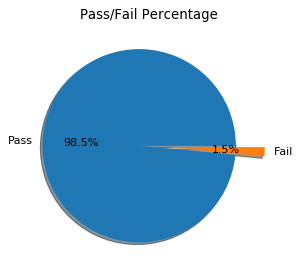

In [7]:
# anaylsing how many students have passed and failed
plt.figure(figsize=(8,4), dpi=80)
labels=['Pass','Fail']
pass_student=(df_clean[df_clean['result']=='PASS']['result'].count())*100/df_clean.shape[0]
fail_student=(df_clean[df_clean['result']=='FAIL']['result'].count())*100/df_clean.shape[0]
print("Percentage of students who have passed "+str(pass_student))
print("Percentage of students who have failed "+str(fail_student))
ex=(0.1,0.2)
result1=[pass_student,fail_student]
plt.pie(result1,labels=labels,autopct='%1.1f%%',shadow=True,explode=ex);
plt.title("Pass/Fail Percentage");

> Conclusion 2: It can be depicted from above pie chart that a majority of students have passed in all the subjects whereas out of 1000 students only 15 students have failed in clearing the examinations.

##  Anaylsis of marks scored by each category of gender in each subject

> What is the average marks scored by each gender in every subject?

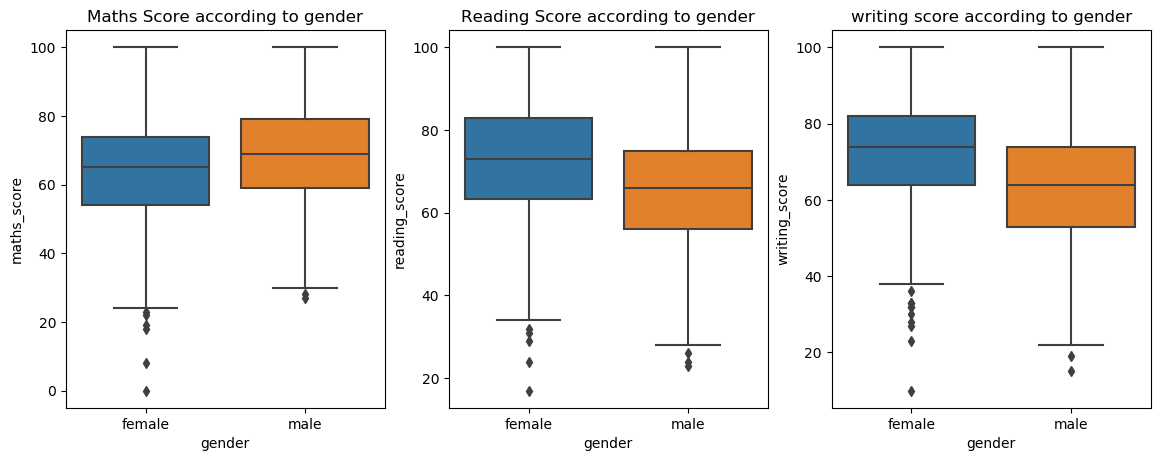

In [8]:
    plt.figure(figsize=(14,5), dpi=100)
    plt.subplot(1, 3, 1);
    
    #plot for maths score
    count=df_clean.groupby('gender')['maths_score'].mean()
    sns.boxplot(x='gender', y='maths_score',data=df_clean)
    plt.title("Maths Score according to gender");

    #plot for reading score
    plt.subplot(1, 3, 2);
    sns.boxplot(x='gender', y='reading_score',data=df_clean)
    plt.title("Reading Score according to gender");
    
    #plot for writing score
    plt.subplot(1, 3, 3);
    sns.boxplot(x='gender', y='writing_score',data=df_clean)
    plt.title("writing score according to gender");
    
    plt.show();
    

 > Conclusion 3: As we can see from above plot average male gender tends to perform better in maths as compared to reading and writing as compared to female gender. The average marks obtained by female gender is greater than average score obtained by male gender in both reading and writing.

## Correlation between scores in each subject.

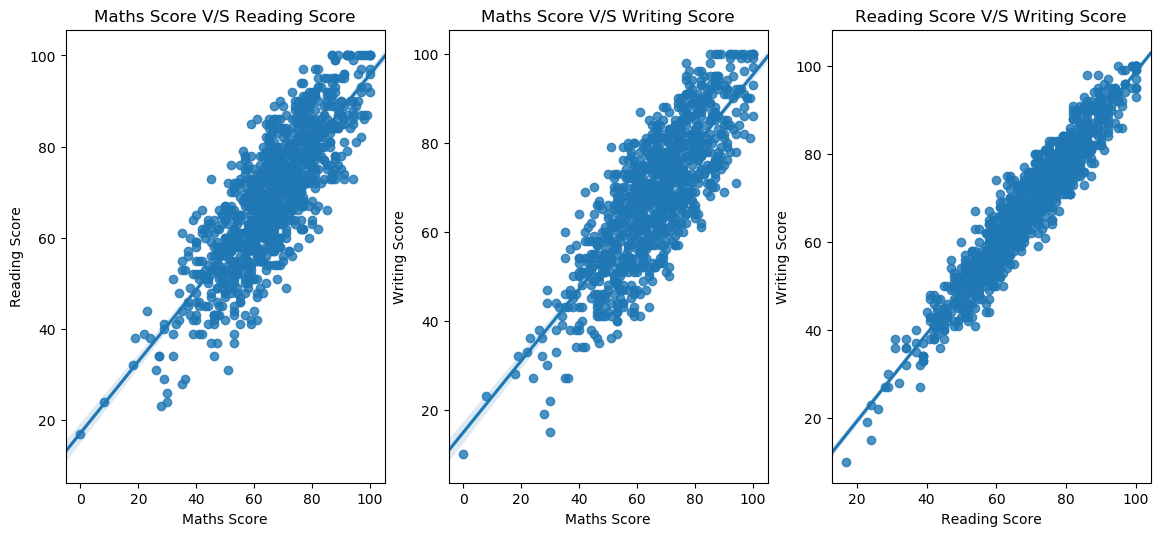

In [9]:
    plt.figure(figsize=(14,6), dpi=100)
    plt.subplot(1, 3, 1);
    
    sns.regplot(x='maths_score', y='reading_score',data=df_clean)
    plt.xlabel("Maths Score");
    plt.ylabel("Reading Score")
    plt.title("Maths Score V/S Reading Score");


    plt.subplot(1, 3, 2);
    sns.regplot(x='maths_score', y='writing_score',data=df_clean)
    plt.xlabel("Maths Score")
    plt.ylabel("Writing Score")
    plt.title("Maths Score V/S Writing Score");
    
    plt.subplot(1, 3, 3);
    sns.regplot(x='reading_score', y='writing_score',data=df_clean)
    plt.xlabel("Reading Score")
    plt.ylabel("Writing Score")
    plt.title("Reading Score V/S Writing Score");
    plt.show();
    

>Conclusion 4 : It can be concluded from above plot that all scores tend to follow a positive correlation with each other, if marks in one subject increases the marks in other subject also increases.


## Average scores in each subject based on gender and race

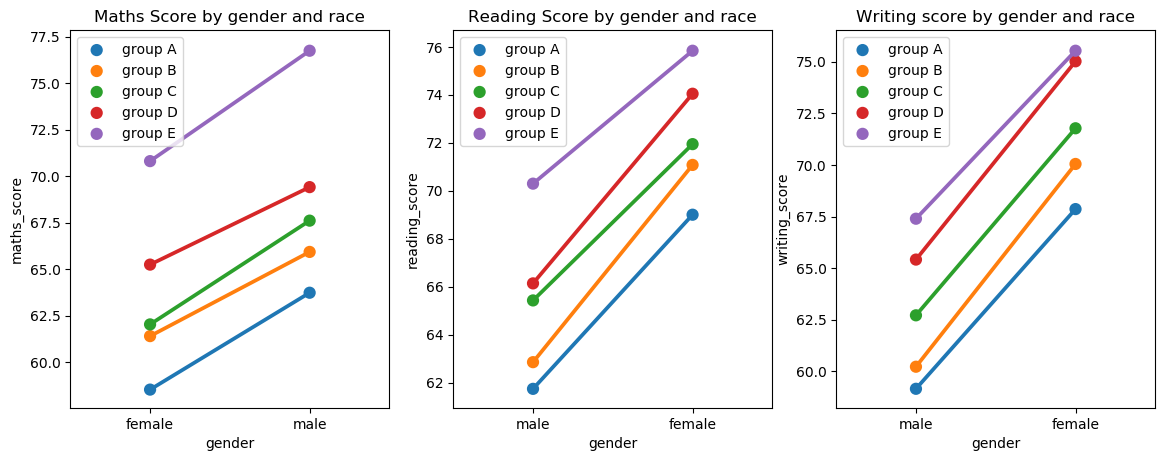

In [10]:
    plt.figure(figsize=(14,5), dpi=100)
    color=sns.color_palette()[0]
    
    #plot for maths score
    plt.subplot(1, 3, 1);
    count=df_clean.groupby(['gender','race'],as_index=False)['maths_score'].mean().sort_values(by='maths_score')
    sns.pointplot(x='gender',y='maths_score',hue='race',data=count)
    plt.title("Maths Score by gender and race");
    plt.legend(loc=2)


    # plot for reading score
    plt.subplot(1, 3, 2);
    count=df_clean.groupby(['gender','race'],as_index=False)['reading_score'].mean().sort_values(by='reading_score')
    sns.pointplot(x='gender', y='reading_score',hue='race',data=count)
    plt.title("Reading Score by gender and race");
    plt.legend(loc=2)
    
    #plot for writing score
    plt.subplot(1, 3, 3);
    count=df_clean.groupby(['gender','race'],as_index=False)['writing_score'].mean().sort_values(by='writing_score')
    sns.pointplot(x='gender', y='writing_score',hue='race',data=count)
    plt.title("Writing score by gender and race");
    plt.legend(loc=2)
    
    plt.show();
    

> Conclusion 5:
The conclusion that can be drawn from above plot females belonging to group E tend to perform better in reading and writing as compared to males belonging to Group E . Males from all groups perfroms better in maths as compared to females of same group. The order of scores obtained can be summarized as follows:
Group E > Group D > Group C > Group B > Group A

### Total Score and percentage by result and parental education

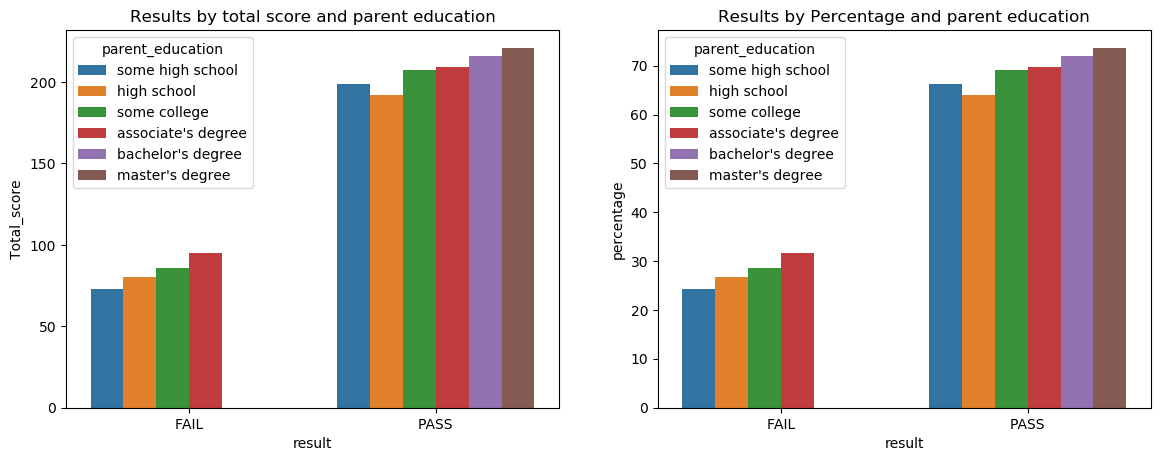

In [11]:
plt.figure(figsize=(14,5), dpi=100)
plt.subplot(1,2,1)
count=df_clean.groupby(['parent_education','result'],as_index=False)['Total_score'].mean().sort_values(by='Total_score');
sns.barplot(x='result',y='Total_score',hue='parent_education',data=count);
plt.title("Results by total score and parent education");

plt.subplot(1,2,2)
count=df_clean.groupby(['parent_education','result'],as_index=False)['percentage'].mean().sort_values(by='percentage');
sns.barplot(x='result',y='percentage',hue='parent_education',data=count);
plt.title("Results by Percentage and parent education");

> Conclusion 6 :It can visualised from above plot that students whose parents have completed masters/bachelors degree in education have not failed in examinations and highest total score is obtained by students whose parents have completed master's degree followed by students whose parents have completed bachelors degree . Lowest total score and percentage have been recorded by students whose parents have gone to some high school or just completed high school

### Average Scores by test preparation course and Pass/Fail Result

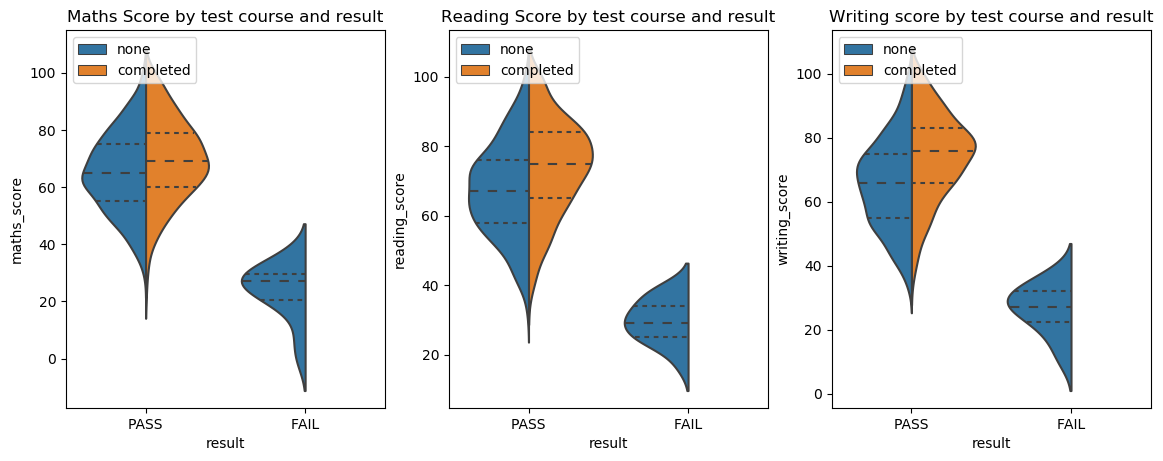

In [12]:
    plt.figure(figsize=(14,5), dpi=100)
    color=sns.color_palette()[0]
    
    # plot for maths score
    plt.subplot(1, 3, 1);
    count=df_clean.groupby(['test_preparation_course','result'],as_index=False)['maths_score'].mean().sort_values(by='maths_score')
    sns.violinplot(x='result',y='maths_score',hue='test_preparation_course',data=df_clean,inner='quartile',split=True)
    plt.title("Maths Score by test course and result");
    plt.legend(loc=2)


    # plot for reading score
    plt.subplot(1, 3, 2);
    count=df_clean.groupby(['test_preparation_course','result'],as_index=False)['reading_score'].mean().sort_values(by='reading_score')
    sns.violinplot(x='result', y='reading_score',hue='test_preparation_course',data=df_clean,inner="quartile",split=True)
    plt.title("Reading Score by test course and result");
    plt.legend(loc=2)

    #plot for writing score
    plt.subplot(1, 3, 3);
    count=df_clean.groupby(['test_preparation_course','result'],as_index=False)['writing_score'].mean().sort_values(by='writing_score')
    sns.violinplot(x='result', y='writing_score',hue='test_preparation_course',data=df_clean,inner="quartile",split=True)
    plt.title("Writing score by test course and result");
    plt.legend(loc=2)
    
    plt.show();
    

> Conclusion 7 :As it can be visualised from above plot that no student that have completed the test preparation course has failed. Only those have failed in their examinations who didn't take up test preparation course. The test preparation course seemed to be an deciding factor in determining the result of the student.It can also be noted that students who have taken the test preparation course tend to have scored higher marks in all subjects.

## Conclusion

#### From the above analysis carried out on Student performance data it can be concluded that:
 
  1.Male gender tends to perform better in subject maths and female gender tends to perform better in other subjects. 

  2.Group E students tend to perform better in all subjects as compared to other groups and Group A students                  performance is the lowest among all other groups. 
  
  3.Out of 1000 students only 15 students have failed making the fail percentage as 1.5% and pass percentage 98.5%. 
  
  4.Test Preparation course also plays a major role in deciding the result of the student.Every student who has                completed the test preparation course have passed in all subjects. All those students have failed who have not            taken the test preparation course.
  
  5.Parent education can also be considered as an important criteria in determining the results of the students.              Students whose parents have completed master's or bachleor's degree have not failed in any subject. Lowest pass            percentage is recorded by students whose parents have just gone to some high school.
                                                                                                                                                      
  
  
  
  
  
  
  

> Once you're ready to finish your presentation, check your output by using
nbconvert to export the notebook and set up a server for the slides. From the
terminal or command line, use the following expression:
> > `jupyter nbconvert <file_name>.ipynb --to slides --post serve --template output_toggle`

> This should open a tab in your web browser where you can scroll through your
presentation. Sub-slides can be accessed by pressing 'down' when viewing its parent
slide. Make sure you remove all of the quote-formatted guide notes like this one
before you finish your presentation!

In [ ]:
!jupyter nbconvert student_deck.ipynb --to slides --post serve --template output_toggle